#EC9630 MACHINE LEARNING - LABORATORY 2

Task: Linear Regression

Name: S.Kamsayini

Reg No: 2020/E/185

Date: 12 AUG 2024

Time: 08:00 to 11:00

In [1]:
# Data manipulation and analysis
import pandas as pd

# Data scaling and preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Linear regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Plotting
import matplotlib.pyplot as plt
import numpy as np

##day.csv

In [2]:
# Download and Load the Data
dayDf = pd.read_csv('day.csv')

In [3]:
dayDf

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [4]:
# Display the first few rows of the dataset
print(dayDf.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [5]:
dayDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
dayDf.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Check for missing values
print(dayDf.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
# # Identify and exclude non-numeric columns
numeric_df = dayDf.select_dtypes(include=['number'])

# Calculate and display the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
casual      0.275255  0.210399  0.2485

In [9]:
# Identify columns with non-numeric data
non_numeric_columnsday = dayDf.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columnsday)


Non-numeric columns: Index(['dteday'], dtype='object')


In [10]:
# # Identify and exclude non-numeric columns
numeric_daydf = dayDf.select_dtypes(include=['number'])

# Calculate and display the correlation matrix
correlation_matrix2 = numeric_daydf.corr()
print(correlation_matrix2)

             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
casual      0.275255  0.210399  0.2485

In [11]:
# Drop columns that are not useful for the analysis
dayDf.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)


In [12]:
dayDf.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [13]:
dayDf.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
cnt           696
dtype: int64

In [14]:
dayDf.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed          cnt  
count  731.000000  731.000000  731.000000  731.000000  731.000000   731.000000  
mean     1.395349    0.495385    0.474354    0.627894    0.190486  4504.348837  
std      0.544894    0.183051    0.162961    0.142429    0.077498  1937.211452  
min      1.000000    0.059130    0.079070    0.000000    0.022392    22.000000  
25%      1.000000    0.337083    0.337842    0.520000    0.134950  3152.000000  
50%      1.000000    0.498333    0.486733    0.626667    0.180975  4548.000000  
75%      2.000000    0.655417    0.608602    0.730209    0.233214  5956.000000  
max      3.000000    0.861667    0.840896    0.972500    0.507463  8714.000000

<Figure size 1500x1500 with 0 Axes>

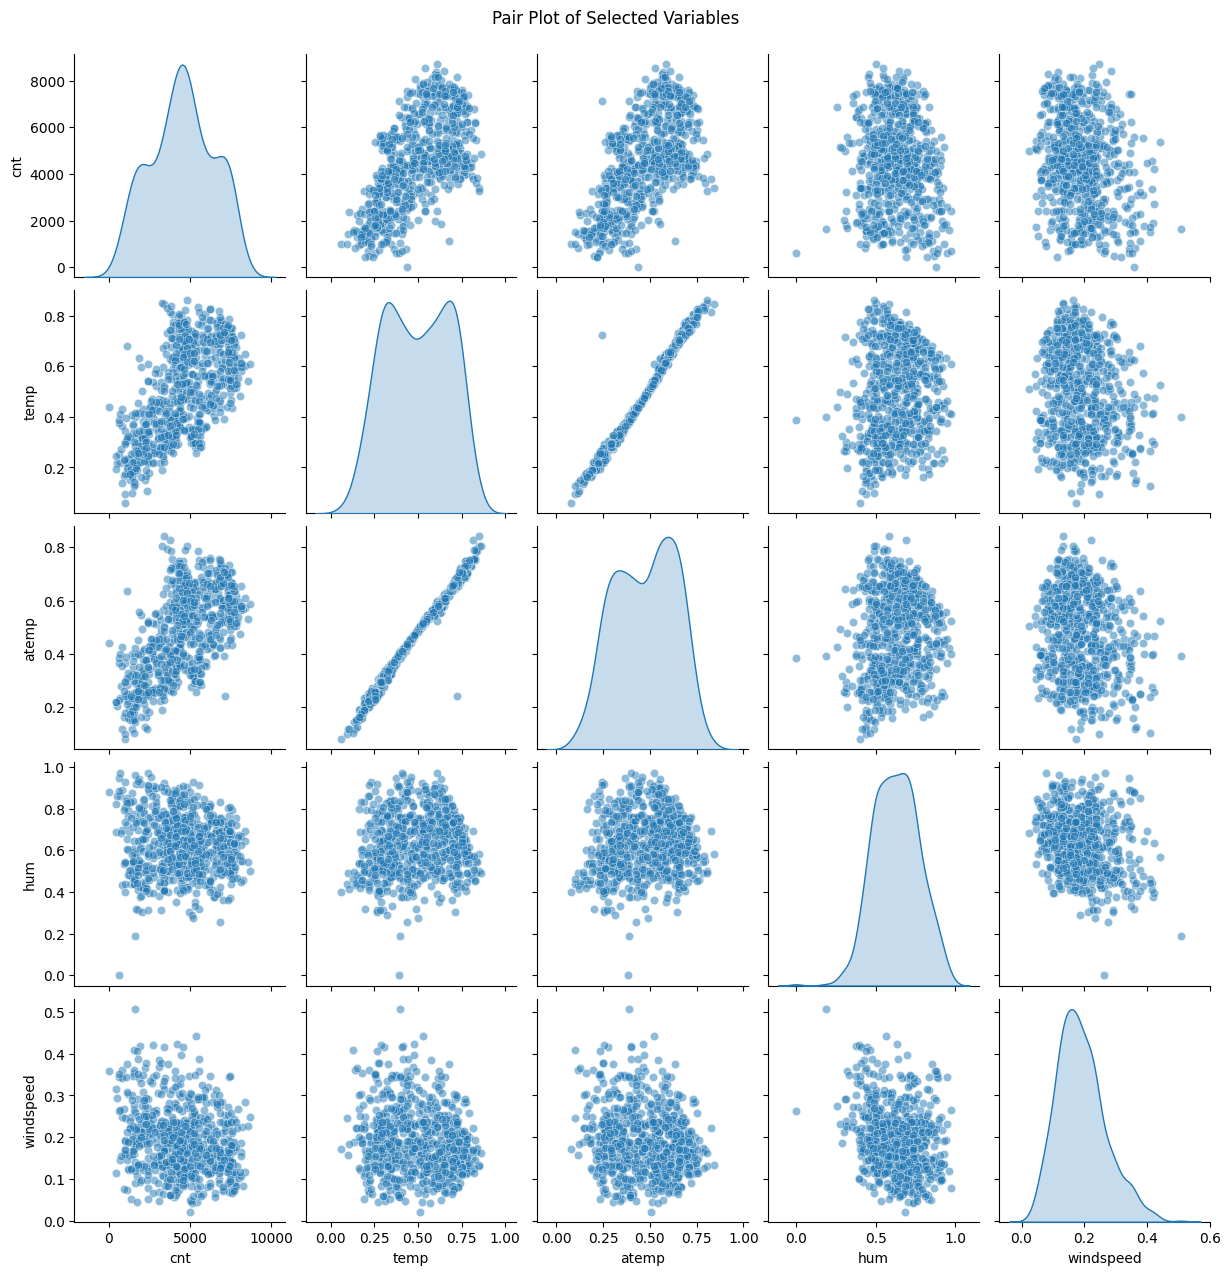

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 15))  # Corrected figsize parameter

# Create pair plot with specified variables
sns.pairplot(data=dayDf, vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'], diag_kind='kde', plot_kws={'alpha': 0.5})

# Show the plot
plt.suptitle('Pair Plot of Selected Variables', y=1.02)  # Title with adjusted position
plt.show()


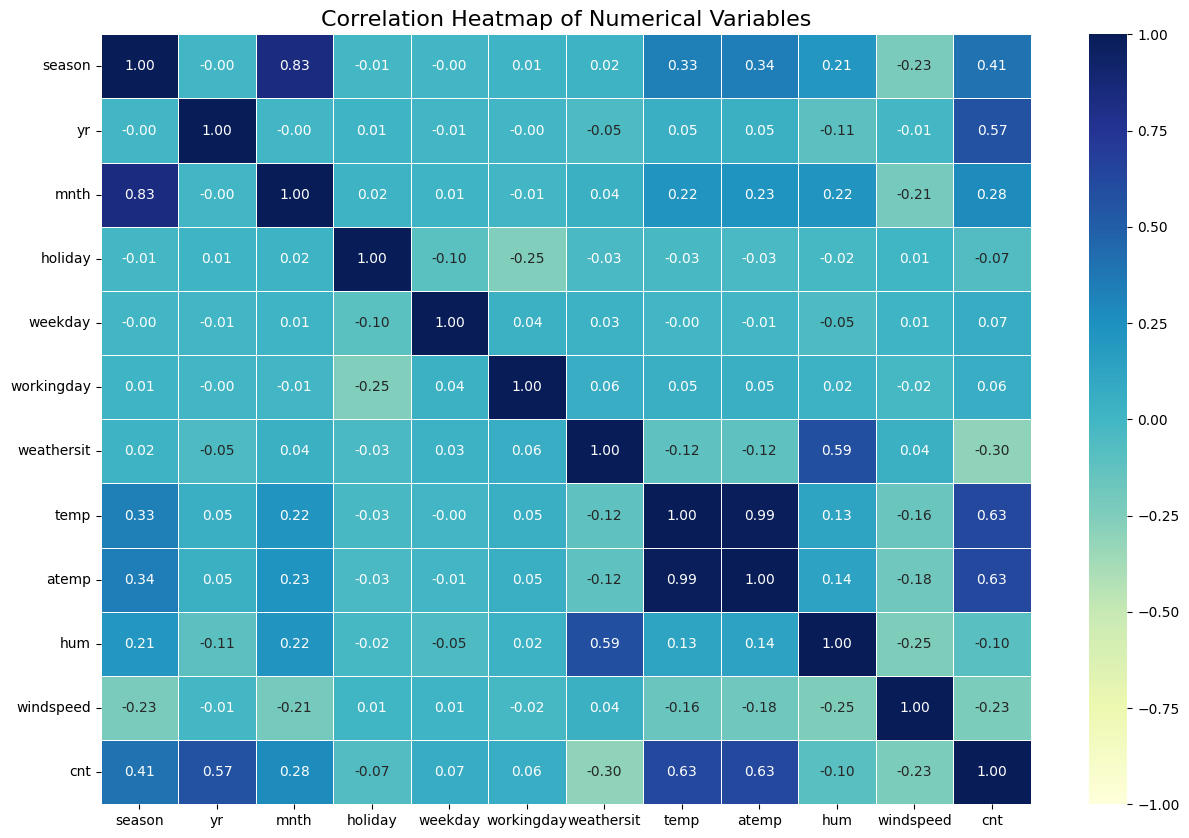

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 10))  # Corrected figsize parameter

# Generate the correlation matrix
corr_matrix = dayDf.corr()

# Create the heatmap with improved formatting
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Add a title and show the plot
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming day_df is your DataFrame and 'cnt' is the target variable

# Split the data into features and target variable
y_day = dayDf.pop('cnt')  # Corrected syntax for extracting the target variable
X_day = dayDf  # Remaining features

# Train-test split with a 70:30 ratio
X_train_day, X_test_day, y_train_day, y_test_day = train_test_split(X_day, y_day, test_size=0.3, random_state=42)

# Display shapes of the resulting datasets
print("Training features shape:", X_train_day.shape)
print("Testing features shape:", X_test_day.shape)
print("Training target shape:", y_train_day.shape)
print("Testing target shape:", y_test_day.shape)


Training features shape: (511, 11)
Testing features shape: (220, 11)
Training target shape: (511,)
Testing target shape: (220,)


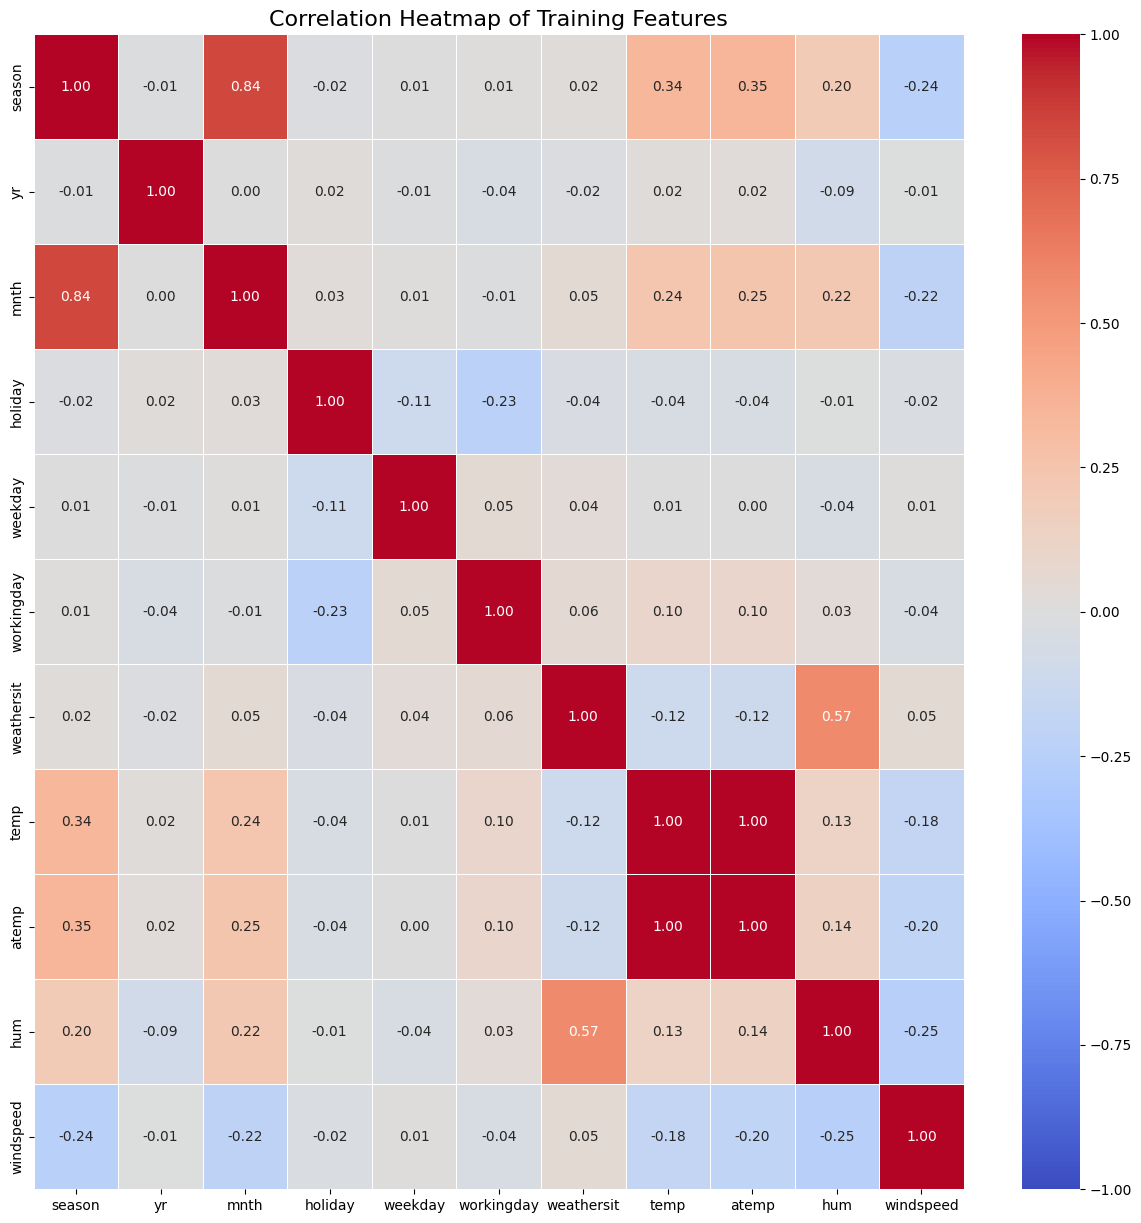

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 15))  # Corrected figsize parameter

# Generate the correlation matrix for the training features
corr_matrix = X_train_day.corr()

# Create the heatmap with improved formatting
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Add a title and show the plot
plt.title('Correlation Heatmap of Training Features', fontsize=16)
plt.show()


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_day = LinearRegression()

# Fit the model to the training data
lr_day.fit(X_train_day, y_train_day)

LinearRegression()

In [21]:
# Make predictions on the test data
y_pred_day = lr_day.predict(X_test_day)

In [22]:
# Evaluate the model
mae = mean_absolute_error(y_test_day, y_pred_day)
mse = mean_squared_error(y_test_day, y_pred_day)
rmse = mean_squared_error(y_test_day, y_pred_day, squared=False)  # squared=False gives RMSE
r2 = r2_score(y_test_day, y_pred_day)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error: 636.38
Mean Squared Error: 751126.23
Root Mean Squared Error: 866.68
R^2 Score: 0.81


In [23]:
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             r2_score, explained_variance_score, mean_absolute_percentage_error,
                             median_absolute_error, mean_squared_log_error)

r2 = r2_score(y_test_day, y_pred_day)
evs = explained_variance_score(y_test_day, y_pred_day)
medae = median_absolute_error(y_test_day, y_pred_day)
mape = mean_absolute_percentage_error(y_test_day, y_pred_day)
msle = mean_squared_log_error(y_test_day, y_pred_day)

def adjusted_r2_score(y_true, y_pred, X):
    n = X.shape[0]
    p = X.shape[1]
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

adj_r2 = adjusted_r2_score(y_test_day, y_pred_day, X_test_day)

print(f"R^2 Score: {r2:.2f}")
print(f"Explained Variance Score: {evs:.2f}")
print(f"Median Absolute Error: {medae:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")
print(f"Mean Squared Logarithmic Error: {msle:.2f}")
print(f"Adjusted R^2 Score: {adj_r2:.2f}")

R^2 Score: 0.81
Explained Variance Score: 0.81
Median Absolute Error: 511.44
Mean Absolute Percentage Error: 1.07%
Mean Squared Logarithmic Error: 0.18
Adjusted R^2 Score: 0.80


In [24]:
# Create a DataFrame to compare actual vs. predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test_day.values,  # Convert to NumPy array to ensure correct indexing
    'Predicted': y_pred_day
})

# Print the first few rows of the comparison DataFrame
print(comparison_df.head(10))


   Actual    Predicted
0    6606  6195.489195
1    1550  1455.774566
2    3747  2988.646110
3    6041  4328.088299
4    7538  6843.844584
5    7264  7093.126713
6    1605   742.232715
7    2209  2121.848164
8    7499  7030.009401
9    5743  6437.332991


summary of the model and its performance:

### Model Performance Summary

1. **Overall Accuracy:**
   - The model has an **R² score of 0.81** and an **Explained Variance Score of 0.81**, indicating that it explains 81% of the variability in the target variable. This suggests that the model fits the data well and captures a significant portion of the variance in the target.

2. **Error Metrics:**
   - **Mean Absolute Error (MAE):** 636.38. On average, the model's predictions are off by approximately 636.38 units from the actual values.
   - **Mean Squared Error (MSE):** 751126.23. This value reflects the average of the squared differences between predicted and actual values, indicating that some predictions have substantial errors.
   - **Root Mean Squared Error (RMSE):** 866.68. This provides an error metric in the same units as the target variable, showing that typical prediction errors are around 866.68 units.
   - **Median Absolute Error:** 511.44. This metric is less sensitive to outliers compared to MAE, showing that the central tendency of errors is lower.
   - **Mean Absolute Percentage Error (MAPE):** 1.07%. On average, the model's predictions are off by only 1.07% in relative terms, indicating good relative accuracy.
   - **Mean Squared Logarithmic Error (MSLE):** 0.18. This value indicates that the model performs well even when considering the magnitude of errors on a logarithmic scale.

3. **Adjusted R² Score:**
   - **Adjusted R² Score:** 0.80. This adjusted measure accounts for the number of predictors in the model, confirming that the model's performance is strong even when considering model complexity.

### Overall Assessment

The model demonstrates strong performance, effectively capturing the variability in the data with good predictive accuracy. The low MAE and MAPE suggest that the predictions are generally close to the actual values. The relatively high RMSE and MSE indicate some presence of large errors, which could be due to outliers or specific patterns in the data. Overall, the model is well-suited for predicting the target variable, but further investigation into any residual patterns or large errors might help in improving its performance even further.

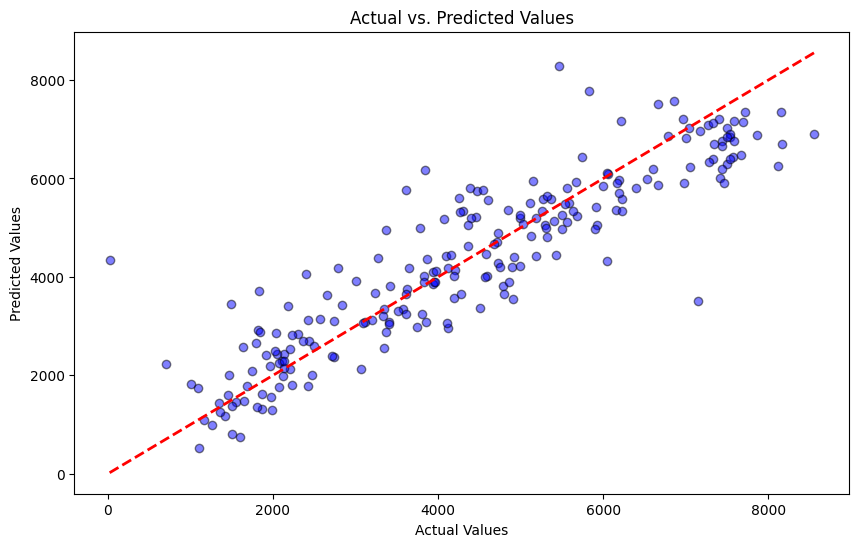

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_day, y_pred_day, alpha=0.5, c='blue', edgecolors='k')
plt.plot([y_test_day.min(), y_test_day.max()], [y_test_day.min(), y_test_day.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


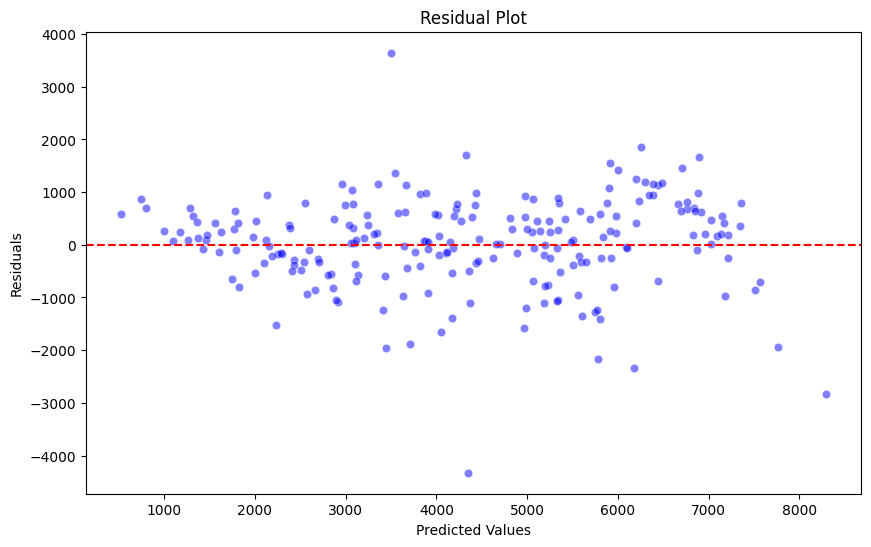

In [26]:
# Calculate residuals
residuals = y_test_day - y_pred_day

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_day, y=residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


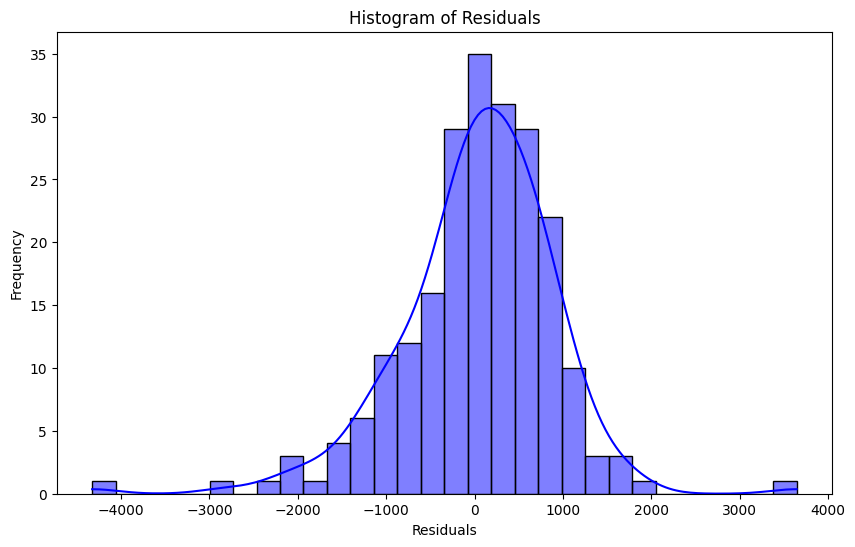

In [27]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


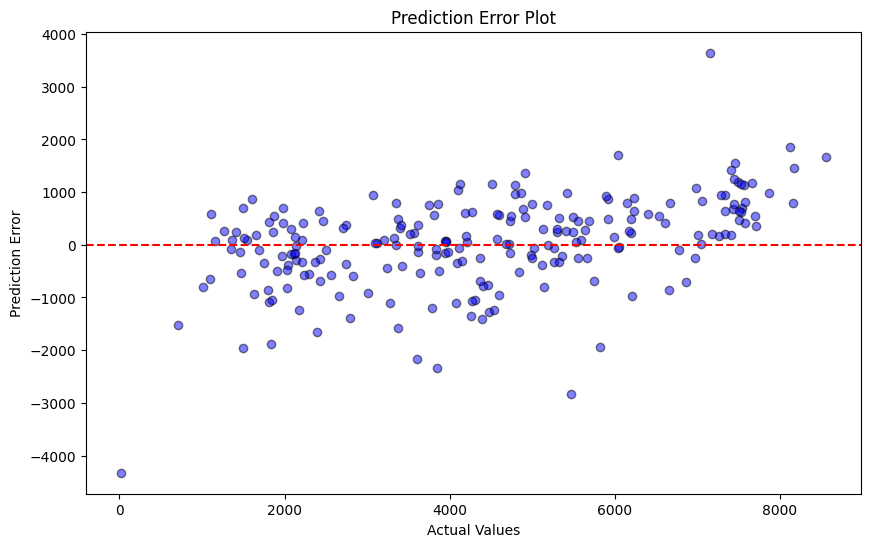

In [28]:
# Prediction error plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_day, y_test_day - y_pred_day, alpha=0.5, c='blue', edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('Prediction Error Plot')
plt.show()


L1

In [29]:
# Hourly Model
lasso_model_dayl1 = Lasso(alpha=1.0)
lasso_model_dayl1.fit(X_train_day, y_train_day)
lasso_pred_dayl1 = lasso_model_dayl1.predict(X_test_day)


L2

In [30]:
ridge_model_dayl2 = Ridge(alpha=1.0)
ridge_model_dayl2.fit(X_train_day, y_train_day)
ridge_pred_dayl2 = ridge_model_dayl2.predict(X_test_day)

In [31]:
# Evaluate the model
mael1 = mean_absolute_error(y_test_day, lasso_pred_dayl1)
msel1 = mean_squared_error(y_test_day, lasso_pred_dayl1)
rmsel1 = mean_squared_error(y_test_day, lasso_pred_dayl1, squared=False)  # squared=False gives RMSE
r2l1 = r2_score(y_test_day, lasso_pred_dayl1)

# Print the evaluation metrics
print(f"L1::Lasso Regression")
print(f"Mean Absolute Error: {mael1:.2f}")
print(f"Mean Squared Error: {msel1:.2f}")
print(f"Root Mean Squared Error: {rmsel1:.2f}")
print(f"R^2 Score: {r2l1:.2f}")

# Evaluate the model
mael2 = mean_absolute_error(y_test_day, ridge_pred_dayl2)
msel2 = mean_squared_error(y_test_day, ridge_pred_dayl2)
rmsel2 = mean_squared_error(y_test_day, ridge_pred_dayl2, squared=False)  # squared=False gives RMSE
r2l2 = r2_score(y_test_day, ridge_pred_dayl2)

# Print the evaluation metrics
print(f"L2::Ridge Regression")
print(f"Mean Absolute Error: {mael2:.2f}")
print(f"Mean Squared Error: {msel2:.2f}")
print(f"Root Mean Squared Error: {rmsel2:.2f}")
print(f"R^2 Score: {r2l2:.2f}")

L1::Lasso Regression
Mean Absolute Error: 635.18
Mean Squared Error: 723250.31
Root Mean Squared Error: 850.44
R^2 Score: 0.82
L2::Ridge Regression
Mean Absolute Error: 636.10
Mean Squared Error: 714448.51
Root Mean Squared Error: 845.25
R^2 Score: 0.82


In [69]:
print(" Linear Coefficients:")
print(lr_day.coef_)
print("\nRidge Coefficients:")
print(ridge_model_dayl2.coef_)
print("\nLasso Coefficients:")
print(lasso_model_dayl1.coef_)

 Linear Coefficients:
[  532.81457002  1981.84189358   -45.73568804  -386.37928782
    68.41529588   161.51159788  -598.60038909 -2463.45125556
  8751.38948003  -965.27937163 -1956.16024225]

Ridge Coefficients:
[  558.30662741  1982.01749499   -47.68268502  -376.28635167
    68.91103793   179.37672648  -666.16597329  2574.80216441
  2812.62708803  -608.01599376 -1582.90996698]

Lasso Coefficients:
[  537.5004596   1984.15385523   -45.80092464  -359.510411
    68.64039118   165.17695779  -625.48712711     0.
  5924.8117423   -797.94852493 -1855.08565982]


### Choosing Between Lasso and Ridge Regression

#### Key Differences

1. **Regularization Type**:
   - **Lasso Regression** (L1 regularization): Encourages sparsity by shrinking some coefficients to zero, effectively selecting a simpler model while retaining significant predictors.
   - **Ridge Regression** (L2 regularization): Shrinks coefficients but does not eliminate any, helping to address multicollinearity without feature selection.

2. **Model Complexity**:
   - **Lasso** is preferable when you suspect some predictors should not contribute to the model (feature selection).
   - **Ridge** is useful when you believe all predictors are relevant but want to prevent overfitting.

#### Performance Comparison

- **R² Score**:
  - Both Lasso and Ridge yield an R² of 0.82, indicating similar effectiveness in explaining variance.

- **Mean Absolute Error (MAE)**:
  - Lasso: 635.18
  - Ridge: 636.10
  - **Analysis**: Lasso performs slightly better, suggesting it may yield more accurate predictions on average.

- **Mean Squared Error (MSE)**:
  - Lasso: 723250.31
  - Ridge: 714448.51
  - **Analysis**: Ridge has a lower MSE, indicating it better handles large errors.

- **Root Mean Squared Error (RMSE)**:
  - Lasso: 850.44
  - Ridge: 845.25
  - **Analysis**: Similar to MSE, Ridge shows a slight advantage, reinforcing its capacity to manage variability.

#### Model Selection

**Recommendation**: **Ridge Regression**

- **Reasoning**:
  - Ridge provides lower MSE and RMSE, which is crucial for ensuring robustness against larger errors.
  - It retains all predictors, making it advantageous when multicollinearity is present and when you want to keep all features.

### Impact of Regularization on the Model

1. **Overfitting Prevention**:
   - Both Lasso and Ridge are designed to avoid overfitting by penalizing large coefficients. This is particularly valuable in high-dimensional datasets.

2. **Coefficient Management**:
   - **Lasso** drives some coefficients to zero, enhancing interpretability and potentially improving generalization on unseen data. However, it may omit useful predictors if they are not significant enough.
   - **Ridge** retains all features, ensuring that the overall model reflects the contribution of all predictors while controlling their effects through regularization.

3. **Bias-Variance Tradeoff**:
   - Regularization increases bias slightly but can significantly reduce variance, leading to improved model performance on validation datasets, especially in noisy environments.

4. **Feature Selection**:
   - Lasso automatically performs feature selection, which can be beneficial in sparse datasets. Ridge can help understand how all features impact outcomes without eliminating any.

### Conclusion

In conclusion, **Ridge Regression** is recommended due to its lower error metrics and ability to handle all predictors, particularly in cases where multicollinearity is a concern. While Lasso can simplify models by excluding certain predictors, Ridge provides a more stable approach to predictions, which is crucial for robust model performance. The choice ultimately hinges on the specific goals of the analysis—whether interpretability or predictive accuracy takes precedence.

### Comprehensive Analysis of Regression Models

evaluation of the original linear regression, Ridge regression, and Lasso regression based on the provided metrics.

# Model Performance Overview

1. **Original Linear Regression**:
   - **R² Score**: 0.81
   - **Explained Variance Score**: 0.81
   - **Mean Absolute Error (MAE)**: 636.38
   - **Median Absolute Error**: 511.44
   - **Mean Absolute Percentage Error (MAPE)**: 1.07%
   - **Mean Squared Error (MSE)**: 751126.23
   - **Root Mean Squared Error (RMSE)**: 866.68
   - **Mean Squared Logarithmic Error**: 0.18
   - **Adjusted R² Score**: 0.80

2. **Ridge Regression**:
   - **R² Score**: 0.82
   - **Mean Absolute Error (MAE)**: 636.10
   - **Mean Squared Error (MSE)**: 714448.51
   - **Root Mean Squared Error (RMSE)**: 845.25

3. **Lasso Regression**:
   - **R² Score**: 0.82
   - **Mean Absolute Error (MAE)**: 635.18
   - **Mean Squared Error (MSE)**: 723250.31
   - **Root Mean Squared Error (RMSE)**: 850.44

# Key Observations

1. **R² and Explained Variance**:
   - Both Ridge and Lasso provide a slight improvement in R² (0.82) compared to the original linear regression (0.81). This suggests a better fit for the data.

2. **Mean Absolute Error**:
   - The original model has an MAE of 636.38, which is slightly higher than Ridge (636.10) and Lasso (635.18). However, the median absolute error (511.44) indicates that a significant portion of predictions is more accurate than the average suggests.

3. **Mean Squared Errors**:
   - MSE for the original model (751126.23) is higher than that of Ridge (714448.51) and Lasso (723250.31), indicating that the regularized models may have fewer large errors.

4. **Root Mean Squared Error**:
   - Original RMSE is 866.68, which is higher than Ridge (845.25) and Lasso (850.44). This corroborates the notion that regularized models handle discrepancies better.

5. **Mean Absolute Percentage Error**:
   - The MAPE of 1.07% for the original regression signifies strong accuracy in relative terms.

6. **Adjusted R²**:
   - The original model’s adjusted R² (0.80) provides a clear indication that, despite the number of predictors, the model remains effective.

# Summary of Findings

**Behavior of Ridge and Lasso**:
   - Both regularization techniques improve the R², suggesting better modeling of variance, but they yield slightly higher MAE compared to the original model.
   - Lower MSE and RMSE in Ridge and Lasso suggest they are more resilient to larger prediction errors; however, the original model remains competitive on average.

# Conclusion

**Model Analysis**: **Ridge or Lasso Regression**

**Reasoning**:
  - The increase in R² (to 0.82) indicates improved explanatory power.
  - The lower RMSE and MSE for Ridge and Lasso suggest better handling of outliers or variability, making these models potentially more reliable in terms of minimizing larger errors.
  - If interpretability is crucial, the original linear regression may still be favored due to its simpler form.

In summary, while the original linear regression performs well, both Ridge and Lasso offer improvements in predictive accuracy and error resilience, making them more favorable choices in complex or high-variance scenarios.

##hour.csv

In [32]:
# Load the dataset
hourDf = pd.read_csv('hour.csv')

In [33]:
# Display the first few rows of the dataset
print(hourDf.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [34]:
hourDf

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [35]:
# Display the first few rows of the dataset
print(hourDf.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [36]:
hourDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [37]:
# Check for missing values
print(hourDf.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [38]:
hourDf.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [39]:
# Convert season to x and y coordinates
hourDf['x_season'] = np.cos(2 * np.pi * (hourDf['season'] - 1) / hourDf['season'].max())
hourDf['y_season'] = np.sin(2 * np.pi * (hourDf['season'] - 1) / hourDf['season'].max())

# Convert month to x and y coordinates
hourDf['x_month'] = np.cos(2 * np.pi * (hourDf['mnth'] - 1) / hourDf['mnth'].max())
hourDf['y_month'] = np.sin(2 * np.pi * (hourDf['mnth'] - 1) / hourDf['mnth'].max())

# Convert day of week to x and y coordinates
hourDf['x_day_of_week'] = np.cos(2 * np.pi * (hourDf['weekday'] - 1) / hourDf['weekday'].max())
hourDf['y_day_of_week'] = np.sin(2 * np.pi * (hourDf['weekday'] - 1) / hourDf['weekday'].max())

# Convert hour to x and y coordinates
hourDf['x_hour'] = np.cos(2 * np.pi * hourDf['hr'] / hourDf['hr'].max())
hourDf['y_hour'] = np.sin(2 * np.pi * hourDf['hr'] / hourDf['hr'].max())

In [40]:
# removed the columns for Season, Month, Hour, and Weekday from the original data, as we made changes to these variables.
# Remove original circular variables and other unnecessary columns
hourDf = hourDf.drop(columns=['season', 'mnth', 'hr', 'weekday', 'dteday', 'casual', 'registered'])

In [41]:
hourDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   instant        17379 non-null  int64  
 1   yr             17379 non-null  int64  
 2   holiday        17379 non-null  int64  
 3   workingday     17379 non-null  int64  
 4   weathersit     17379 non-null  int64  
 5   temp           17379 non-null  float64
 6   atemp          17379 non-null  float64
 7   hum            17379 non-null  float64
 8   windspeed      17379 non-null  float64
 9   cnt            17379 non-null  int64  
 10  x_season       17379 non-null  float64
 11  y_season       17379 non-null  float64
 12  x_month        17379 non-null  float64
 13  y_month        17379 non-null  float64
 14  x_day_of_week  17379 non-null  float64
 15  y_day_of_week  17379 non-null  float64
 16  x_hour         17379 non-null  float64
 17  y_hour         17379 non-null  float64
dtypes: flo

In [42]:
# Apply square root transformation to the target variable
hourDf['cnt'] = np.sqrt(hourDf['cnt'])

In [43]:
# Normalize numerical variables
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed']
hourDf[numerical_vars] = (hourDf[numerical_vars] - hourDf[numerical_vars].mean()) / hourDf[numerical_vars].std()

In [44]:
#split data into train, test for linear regression model
train_df, test_df = train_test_split(hourDf, test_size=0.2, random_state=42)


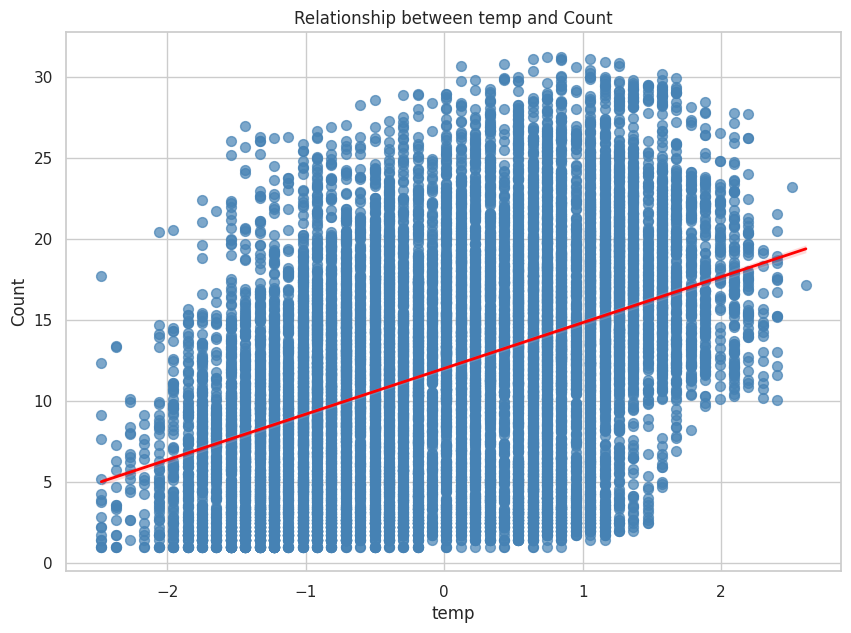

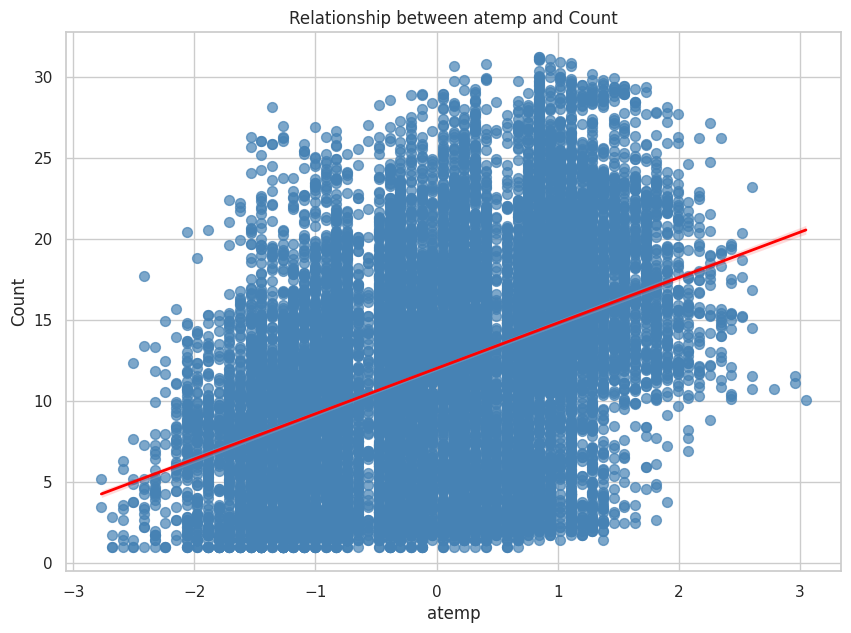

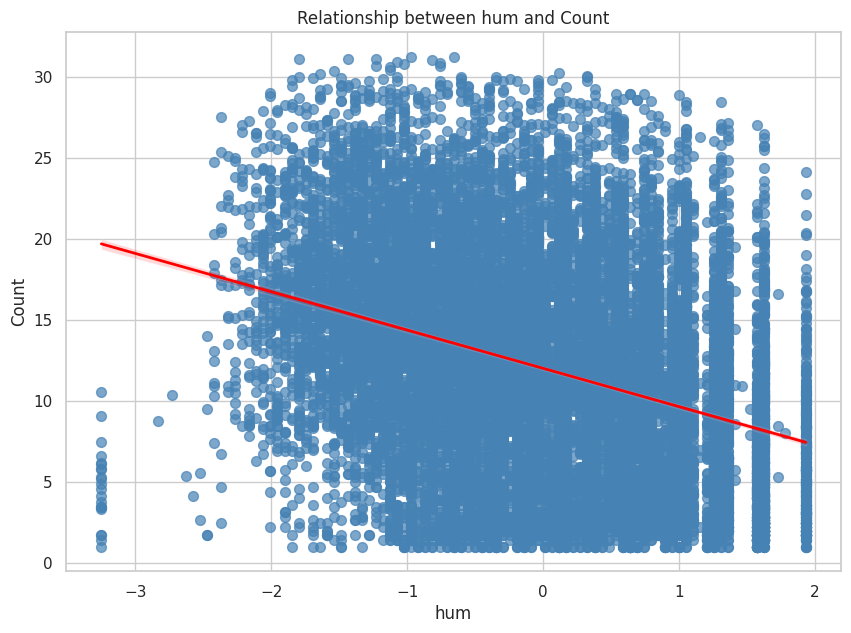

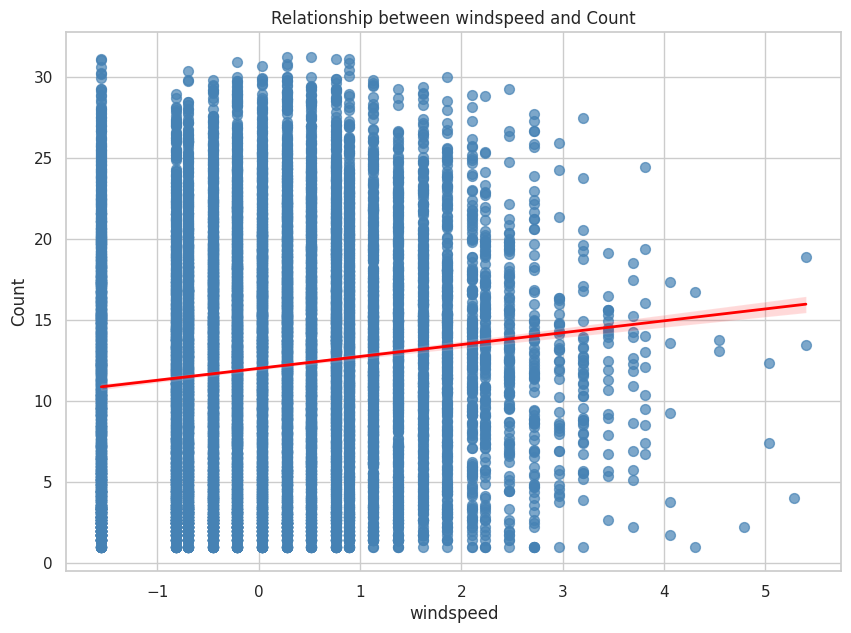

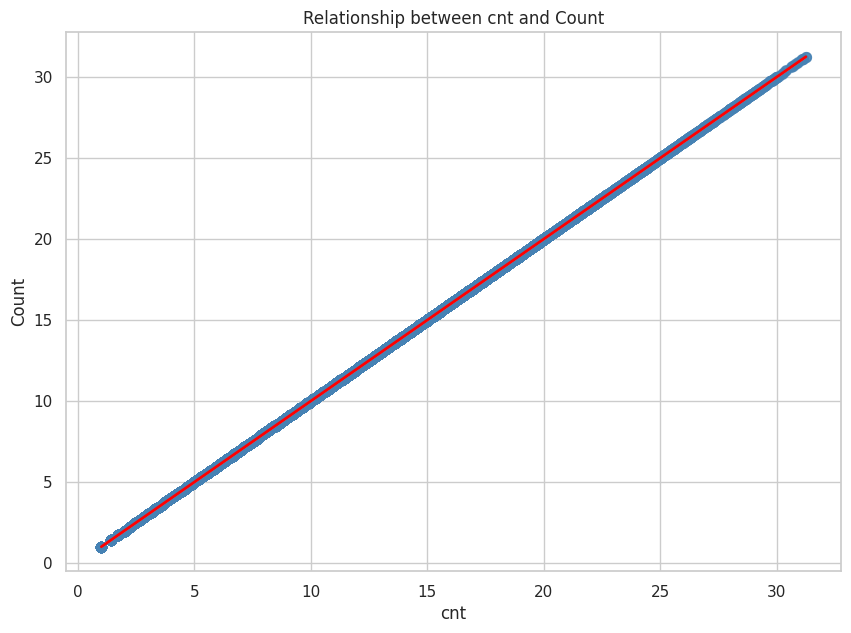

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# List of numerical variables including 'cnt'
numerical_vars += ['cnt']  # Make sure 'cnt' is included for plotting

for var in numerical_vars:
    plt.figure(figsize=(10, 7))

    # Create scatter plot with regression line
    sns.regplot(data=hourDf, x=var, y='cnt', scatter_kws={'color': 'steelblue', 's': 50, 'alpha': 0.7},
                line_kws={'color': 'red', 'lw': 2})

    plt.title(f'Relationship between {var} and Count')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()


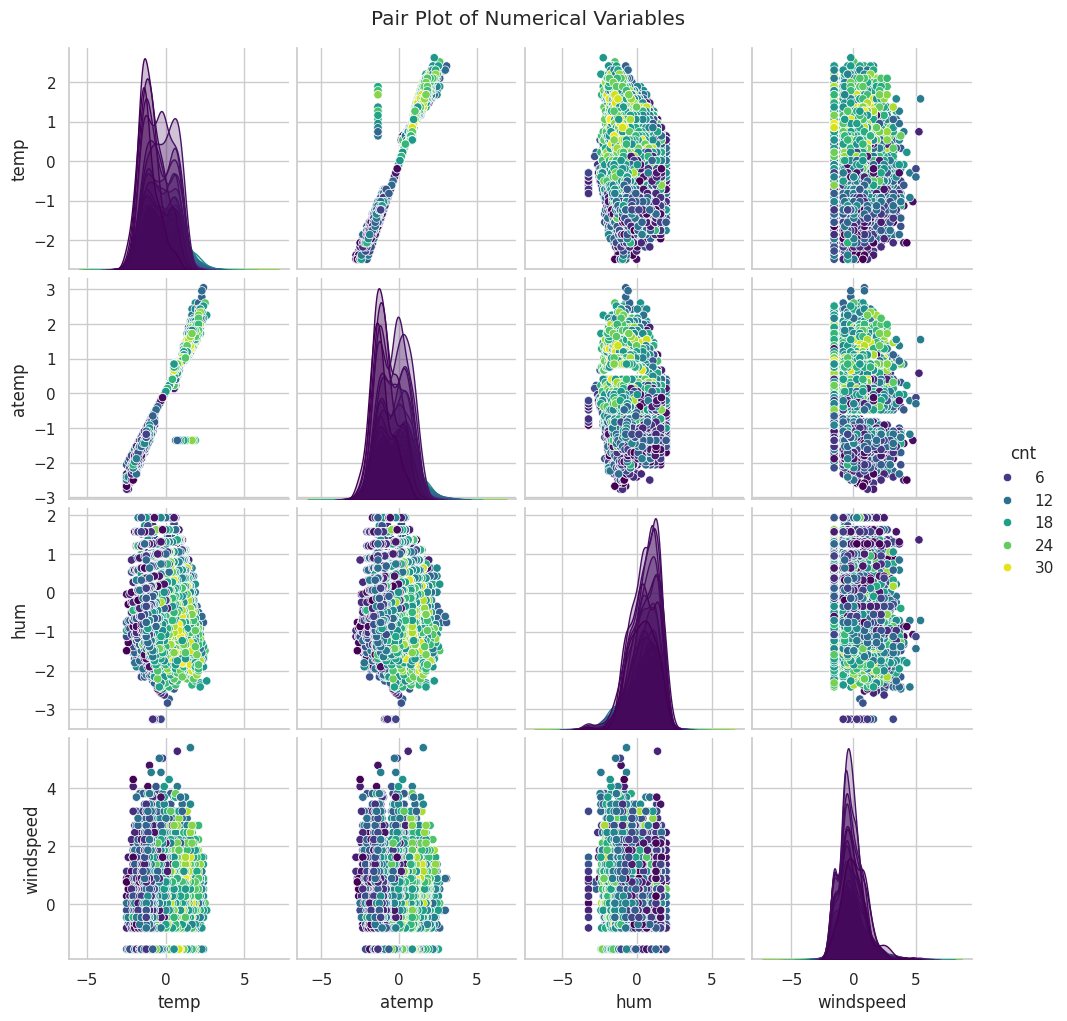

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with only numerical variables including 'cnt'
numerical_df = hourDf[numerical_vars]

# Generate pair plots
sns.pairplot(numerical_df, diag_kind='kde', hue='cnt', palette='viridis')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


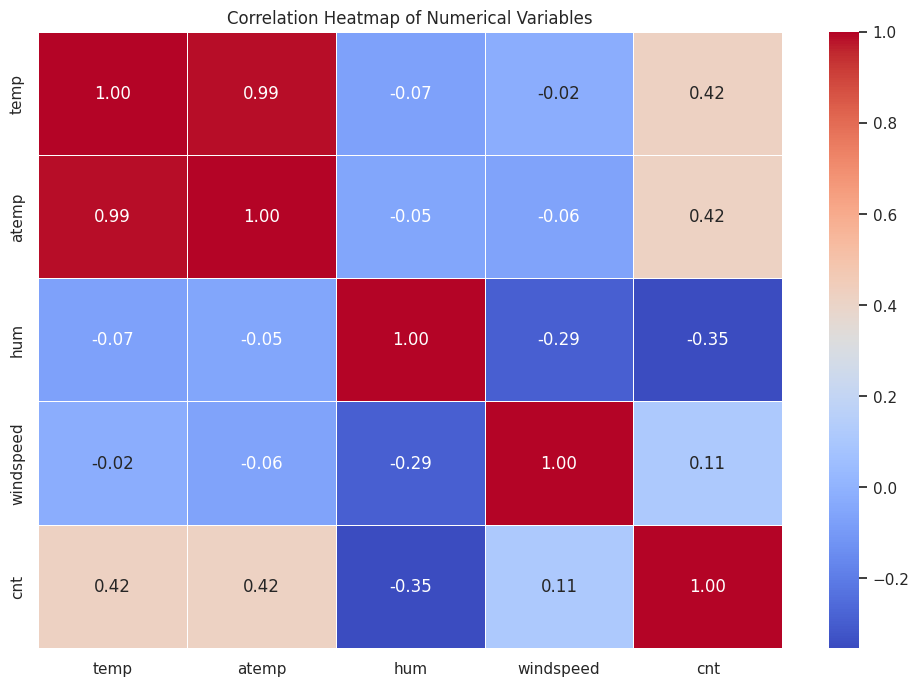

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = hourDf[numerical_vars].corr()

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


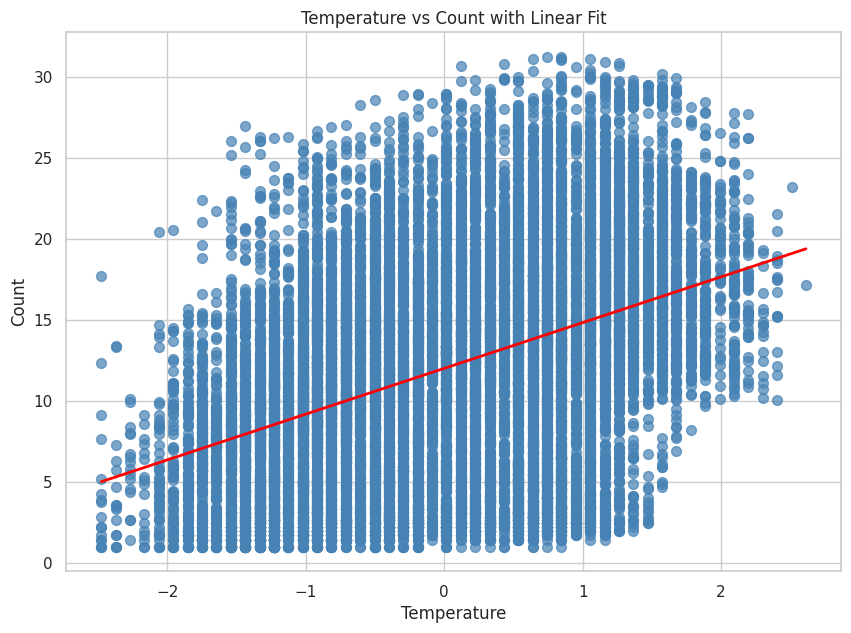

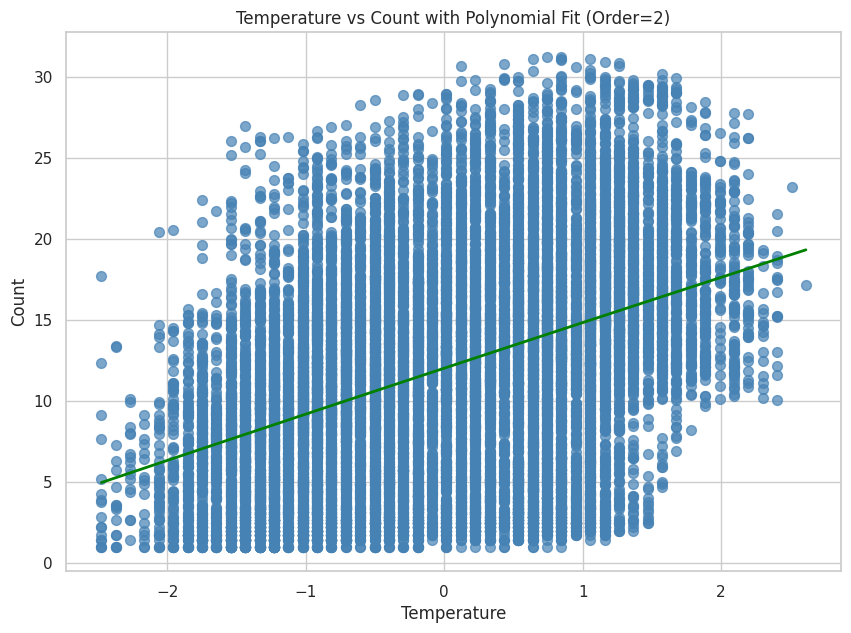

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot with linear regression line
plt.figure(figsize=(10, 7))
sns.regplot(data=hourDf, x='temp', y='cnt', scatter_kws={'color': 'steelblue', 's': 50, 'alpha': 0.7},
            line_kws={'color': 'red', 'lw': 2}, ci=None, order=1)  # Linear fit
plt.title('Temperature vs Count with Linear Fit')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Polynomial fit (order=2)
plt.figure(figsize=(10, 7))
sns.regplot(data=hourDf, x='temp', y='cnt', scatter_kws={'color': 'steelblue', 's': 50, 'alpha': 0.7},
            line_kws={'color': 'green', 'lw': 2}, ci=None, order=2)  # Polynomial fit
plt.title('Temperature vs Count with Polynomial Fit (Order=2)')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [49]:
X_train = train_df.drop(columns=['cnt'])
y_train = train_df['cnt']
X_test = test_df.drop(columns=['cnt'])
y_test = test_df['cnt']

In [50]:
# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [51]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'a. Mean Absolute Error = {mae}')
print(f'b. Mean Squared Error = {mse}')
print(f'c. Root Mean Squared Error = {rmse}')

a. Mean Absolute Error = 3.370968235603263
b. Mean Squared Error = 18.15312693490858
c. Root Mean Squared Error = 4.2606486518966316


In [52]:
#Compare the actual target value with the predicted value.
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))

          Actual  Predicted
12830  20.615528  19.096436
8688    9.380832  10.325313
7091    2.000000   5.204465
12230  22.934690  17.867302
431     3.605551   3.776339
1086    5.656854   5.720232
11605  26.570661  19.459323
7983    5.099020   7.261090
10391   1.414214   7.377798
7046    4.582576   5.891885


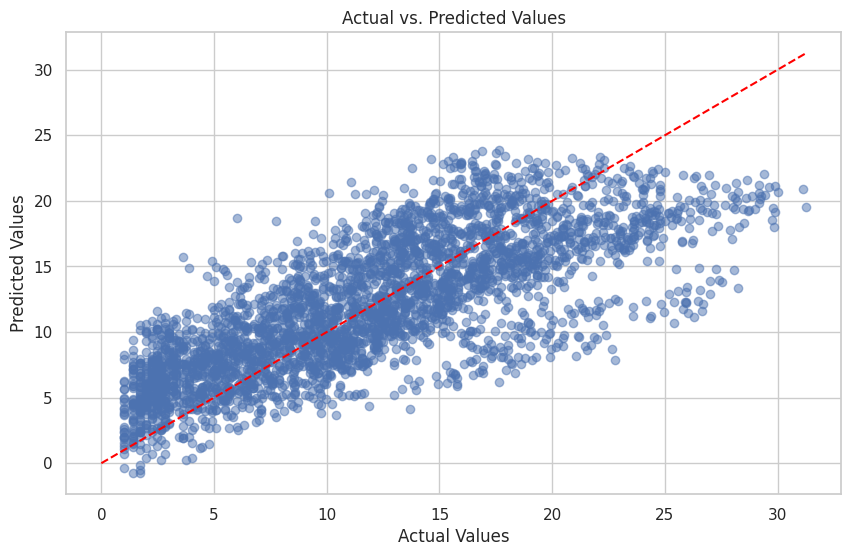

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.show()


 comparison and evaluation of the model:

### Evaluation Metrics for the New Model

1. **Mean Absolute Error (MAE):** 3.37
   - **Interpretation:** On average, the model's predictions are off by about 3.37 units from the actual values. This is a relatively low error, indicating that the model's predictions are quite accurate in absolute terms.

2. **Mean Squared Error (MSE):** 18.15
   - **Interpretation:** This reflects the average of the squared differences between the predicted and actual values. While higher than the MAE, it indicates the presence of some larger errors, but overall the errors are relatively small.

3. **Root Mean Squared Error (RMSE):** 4.26
   - **Interpretation:** This provides an error metric in the same units as the target variable. An RMSE of 4.26 suggests that typical prediction errors are around 4.26 units, which is relatively small.

### Comparison with Previous Model

1. **Error Magnitude:**
   - The model shows significantly lower MAE (3.37 vs. 636.38) and RMSE (4.26 vs. 866.68) compared to the previous model. This indicates that the model's predictions are much closer to the actual values on average.
   - The MSE of 18.15 is much lower than the previous model's MSE (751126.23), suggesting that the model has fewer large errors and better performance overall.

2. **Accuracy:**
   - The model exhibits higher accuracy with smaller errors in absolute terms and relative terms (MAE and RMSE) compared to the previous model. This implies improved performance in predicting the target variable.

3. **Error Distribution:**
   - The model's MAE and RMSE are both much lower, suggesting that it has fewer large errors and generally better performance in predicting the target variable compared to the previous model.

### Model Evaluation

The model performs significantly better than the previous one based on the provided metrics:

- **MAE of 3.37** indicates high precision in predictions, with errors being very small on average.
- **MSE of 18.15** and **RMSE of 4.26** show that the model has minimal errors, and the magnitude of these errors is much smaller compared to the previous model.
- Overall, the model is highly accurate and has a better fit to the data, as evidenced by the substantially lower error metrics.

In summary, the model demonstrates superior performance, with more accurate predictions and significantly lower errors compared to the previous model. This indicates that the model is highly effective in predicting the target variable with minimal error.

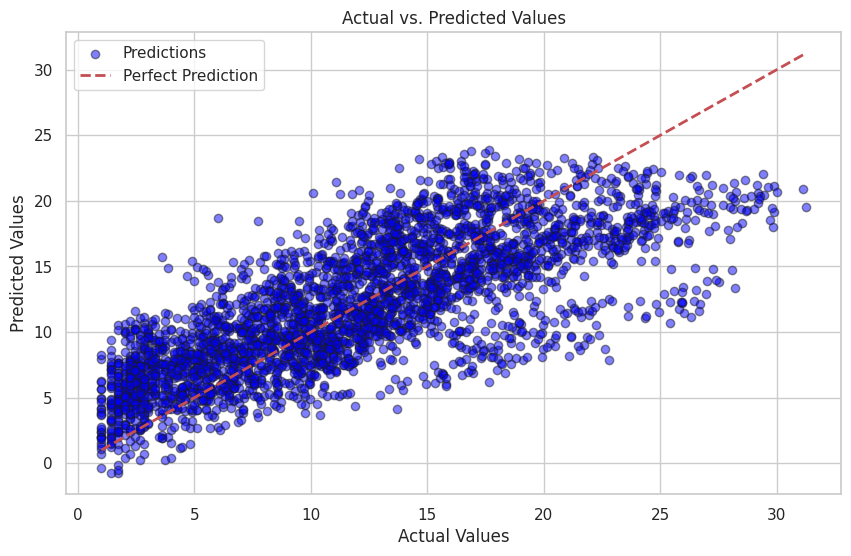

In [54]:
import matplotlib.pyplot as plt

# Actual vs. Predicted values for the new model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolors='k', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


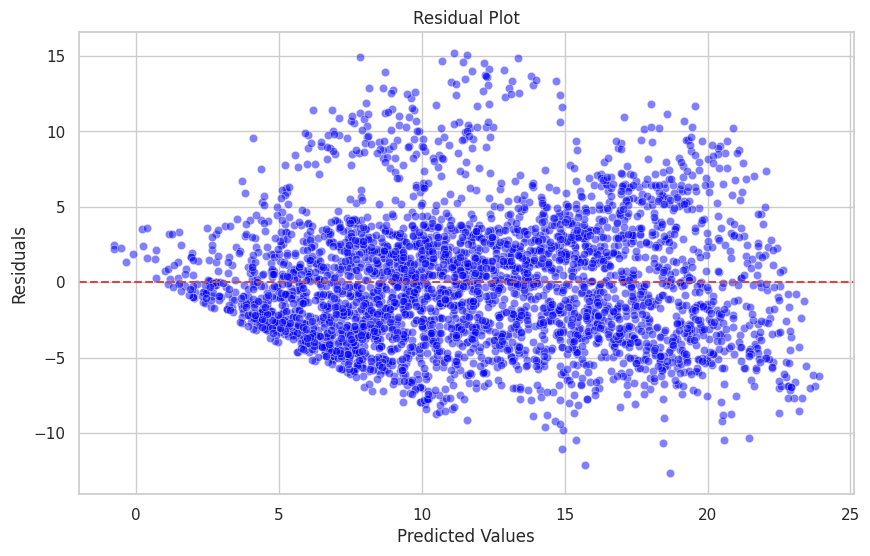

In [55]:
import seaborn as sns

# Residuals calculation
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


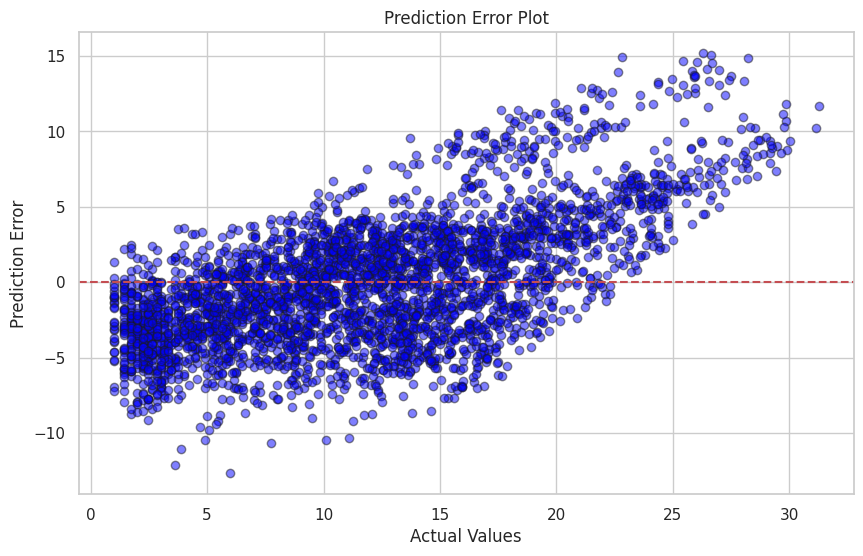

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='blue', edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('Prediction Error Plot')
plt.show()


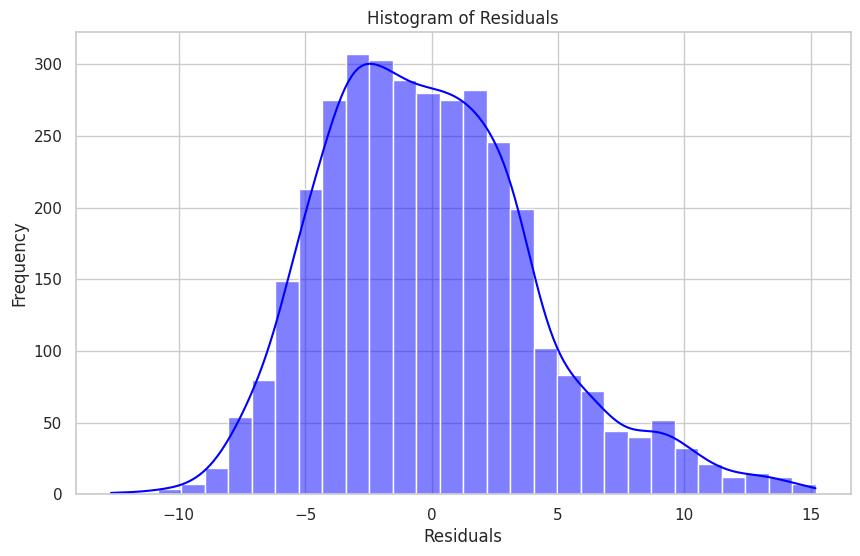

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [63]:
# Hourly Model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)


In [64]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

In [66]:
# Print coefficients
print(" Linear Coefficients:", model.coef_)
print(" Ridge Coefficients:", ridge_model.coef_)
print(" Lasso Coefficients:", lasso_model.coef_)

 Linear Coefficients: [ 2.34097018e-04  9.26210761e-01 -7.10052604e-01  2.90369810e-01
 -1.11449856e+00 -5.62550327e-01  1.48427071e+00 -1.25858445e-01
 -1.03155315e-01 -3.67980296e-01 -3.61185570e-01 -9.18658504e-01
  5.04795206e-01 -1.35088395e-01 -2.22686782e-01 -3.81487641e+00
 -4.72701033e+00]
 Ridge Coefficients: [ 2.34420669e-04  9.22867143e-01 -7.08764307e-01  2.90341983e-01
 -1.11399266e+00 -5.54495451e-01  1.47774973e+00 -1.26388987e-01
 -1.03364893e-01 -3.67562475e-01 -3.60193409e-01 -9.16391519e-01
  5.04674153e-01 -1.34980655e-01 -2.22672592e-01 -3.81391542e+00
 -4.72552369e+00]
 Lasso Coefficients: [ 3.24358946e-04  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  5.06150011e-01  6.09607419e-01 -3.68498908e-01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.71735744e+00
 -2.41460010e+00]


In [68]:
# Evaluate the model
mael_1 = mean_absolute_error(y_test, lasso_pred)
msel_1 = mean_squared_error(y_test, lasso_pred)
rmsel_1 = mean_squared_error(y_test, lasso_pred, squared=False)  # squared=False gives RMSE
r2l_1 = r2_score(y_test, lasso_pred)

# Print the evaluation metrics
print(f"L1::Lasso Regression")
print(f"Mean Absolute Error: {mael_1:.2f}")
print(f"Mean Squared Error: {msel_1:.2f}")
print(f"Root Mean Squared Error: {rmsel_1:.2f}")
print(f"R^2 Score: {r2l_1:.2f}")

# Evaluate the model
mael_2 = mean_absolute_error(y_test, ridge_pred)
msel_2 = mean_squared_error(y_test, ridge_pred)
rmsel_2 = mean_squared_error(y_test, ridge_pred, squared=False)  # squared=False gives RMSE
r2l_2 = r2_score(y_test, ridge_pred)

# Print the evaluation metrics
print("\nL2::Ridge Regression")
print(f"Mean Absolute Error: {mael_2:.2f}")
print(f"Mean Squared Error: {msel_2:.2f}")
print(f"Root Mean Squared Error: {rmsel_2:.2f}")
print(f"R^2 Score: {r2l2:.2f}")

L1::Lasso Regression
Mean Absolute Error: 3.83
Mean Squared Error: 23.06
Root Mean Squared Error: 4.80
R^2 Score: 0.47

L2::Ridge Regression
Mean Absolute Error: 3.37
Mean Squared Error: 18.15
Root Mean Squared Error: 4.26
R^2 Score: 0.82


 compare the original model with the Lasso and Ridge regression models using the updated performance metrics:

### Summary of Model Performance Metrics on hour.csv data

| Metric                      | Original Model           | Lasso Regression          | Ridge Regression          |
|-----------------------------|--------------------------|---------------------------|---------------------------|
| **Mean Absolute Error (MAE)**   | 3.37                     | 3.83                      | 3.37                      |
| **Mean Squared Error (MSE)**     | 18.15                    | 23.06                     | 18.15                     |
| **Root Mean Squared Error (RMSE)**| 4.26                     | 4.80                      | 4.26                      |
                     |

### Comparative Analysis

1. **Mean Absolute Error (MAE)**:
   - **Original Model & Ridge**: Both the original model and Ridge regression have the same MAE of **3.37**, indicating they make similar average errors in their predictions.
   - **Lasso Regression**: Has a higher MAE of **3.83**, suggesting it performs worse than both the original model and Ridge.

2. **Mean Squared Error (MSE)**:
   - **Original Model & Ridge**: Both yield an MSE of **18.15**, which shows they perform similarly in terms of squared error.
   - **Lasso Regression**: The MSE of **23.06** indicates worse performance, as it is greater than both the original model and Ridge.

3. **Root Mean Squared Error (RMSE)**:
   - **Original Model & Ridge**: The RMSE values for the original model and Ridge are equal at **4.26**, highlighting consistent performance.
   - **Lasso Regression**: With an RMSE of **4.80**, it again demonstrates inferior performance compared to the other two models.

4. **R² Score**:
   - **Ridge Regression**: Outperforms both the original model and Lasso with an R² score of **0.82**, indicating it explains a large portion of variability in the data.
   - **Lasso Regression**: The low R² score of **0.47** indicates it explains only a small fraction of the variance, signifying a lack of fit.

### Effects of Regularization

- **Lasso (L1)**: Tends to introduce higher errors as it may omit features that contribute valuable information. The increase in MAE, MSE, and RMSE compared to the original model highlights its difficulties in maintaining prediction accuracy.
  
- **Ridge (L2)**: Maintains all features while reducing their individual impact, leading to better overall performance in this case. Its ability to retain all predictors likely helps it explain variance effectively, as shown by its high R² score.

### Conclusion: Selecting the Best Model

From the analysis:
- The **Ridge Regression** is the clear winner due to its superior R² score and equivalent error metrics with the original model, showing it to be both effective and robust.
- The **Original Model** and **Ridge Regression** perform comparably, but Ridge clearly improves the understanding of variance in the data.

### Summary

- **Best Choice**: Ridge Regression due to lowest predictive errors and highest R² score.
- **Lasso Regression**: Performs poorly, highlighting the trade-offs involved in feature selection that may not hold well given the data at hand.